# Imersão dados Alura 4

## Projeto: Estudo de valor de imóveis na cidade de São Paulo

Instalando a biblioteca geopandas

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importando as bibliotecas que serão utilizadas para fazer a análise do valor dos imóveis em São Paulo.

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

from shapely.geometry import Point
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

Alterando as configurações de exibição de `float` no `DataFrame`.

In [ ]:
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

Importando o dataset com os dados sobre os imóveis na cidade de São Paulo.

In [ ]:
database_url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
df_imoveis_sp = pd.read_csv(database_url)

Imprimindo as 5 primeiras linhas do `DataFrame` para visualizar como os dados estão organizados.

In [ ]:
df_imoveis_sp.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


O resultado acima nos mostra que a coluna Valor não encontra-se com um tipo de dado numérico, sendo assim, precisamos realizar algumas operações nela para que possamos utilizá-la em cálculos. Para confirmar essa constatação, vamos utilizar o método `info()` para obtermos informações acerca do tipo de dado de cada coluna presente no `DataFrame`.

In [ ]:
df_imoveis_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


O output do método `info()` confirma que a coluna valor não encontra-se em um tipo de dado numérico. Antes de tratarmos os dados presentes nessa coluna, vamos visualizar a distribuição dos imóveis em termos da metragem, do número de quartos, do número de banheiros e do número de vagas de garagem.

Aplicando o estilo de plot do Seaborn.

In [ ]:
sns.set()

Analisando o número de quartos nos imóveis.

Os 10 imóveis com o maior número de quartos:

In [ ]:
df_imoveis_sp.nlargest(10, "Quartos")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9711,"Rua Otávio Passos, 0",Vila Gomes,São Paulo,280,16,3,3,R$ 790.000
9747,"Rua Otávio Passos, 0",Vila Gomes,São Paulo,285,16,3,3,R$ 790.000
9609,Avenida Doutor Altino Arantes,Vila Clementino,São Paulo,480,15,8,12,R$ 20.000\n /Mês
1726,NaN,Jardim Paulista,São Paulo,450,13,7,7,R$ 13.000.000
5175,NaN,Parque São Lucas,São Paulo,367,12,5,4,R$ 950.000
9771,NaN,Parque da Mooca,São Paulo,680,12,5,3,R$ 15.000\n /Mês
1127,Rua Bandim,Boaçava,São Paulo,350,11,8,10,R$ 2.500.000
3960,Rua Morro Verde,Pacaembu,São Paulo,1000,11,6,10,R$ 5.499.000
5829,"Rua Emanuel Guedes, 252",Conjunto Residencial Butantã,São Paulo,145,11,1,2,R$ 550.000
6628,"Rua Carlos Petit, 175",Vila Mariana,São Paulo,400,11,5,3,R$ 2.800.000


Os 10 imóveis com o menor número de quartos:

In [ ]:
df_imoveis_sp.nsmallest(10, "Quartos")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
130,Rua Bernardo Vieira,Vila Laís,São Paulo,104,1,1,1,R$ 270.000
185,Rua Quirino Pucca,Vila Romana,São Paulo,65,1,1,2,R$ 480.000
321,NaN,Alto da Lapa,São Paulo,135,1,2,4,R$ 1.550.000
369,Rua Rodolfo Arena,Vila Moraes,São Paulo,54,1,1,2,R$ 305.000
405,NaN,Vila Madalena,São Paulo,35,1,1,1,R$ 2.800\n /Mês
412,NaN,Vila Madalena,São Paulo,40,1,1,1,R$ 2.800\n /Mês
438,Rua Assungui,Vila Gumercindo,São Paulo,500,1,1,1,R$ 10.000\n /Mês
578,NaN,Pinheiros,São Paulo,130,1,2,1,R$ 1.880.000
789,Rua dos Tamanás,Vila Madalena,São Paulo,110,1,1,3,R$ 3.950.000
843,Rua Professor Tranquilli,Vila Mariana,São Paulo,60,1,1,1,R$ 2.100\n /Mês


In [ ]:
df_imoveis_sp["Quartos"].describe()

count   10008.00
mean        3.48
std         1.06
min         1.00
25%         3.00
50%         3.00
75%         4.00
max        16.00
Name: Quartos, dtype: float64

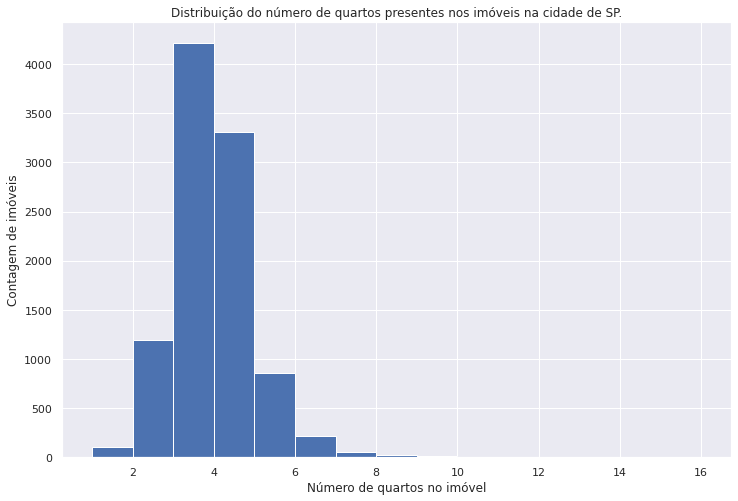

In [ ]:
fig, ax = plt.subplots()
ax = df_imoveis_sp["Quartos"].plot(kind = "hist", bins = 15)
ax.set_xlabel("Número de quartos no imóvel")
ax.set_ylabel("Contagem de imóveis")
ax.set_title("Distribuição do número de quartos presentes nos imóveis na cidade de SP.")
fig.set_size_inches((12, 8))
plt.show()

Analisando o número de banheiros nos imóveis.

Os 10 imóveis com o maior número de banheiros:

In [ ]:
df_imoveis_sp.nlargest(10, "Banheiros")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2062,NaN,Jardim Guedala,São Paulo,488,4,40,4,R$ 2.600.000
2159,NaN,Jardim Guedala,São Paulo,493,4,40,4,R$ 2.600.000
2513,NaN,Vila Tramontano,São Paulo,1650,6,16,42,R$ 100.000\n /Mês
2508,NaN,Retiro Morumbi,São Paulo,2100,7,14,12,R$ 19.800.000
2859,NaN,Pinheiros,São Paulo,1022,4,14,8,R$ 85.000\n /Mês
3029,NaN,Pinheiros,São Paulo,1027,4,14,8,R$ 85.000\n /Mês
3997,Rua David Pimentel,Fazenda Morumbi,São Paulo,916,7,14,10,R$ 3.000.000
1203,Avenida Piassanguaba,Planalto Paulista,São Paulo,1040,6,12,10,R$ 3.000.000
1589,Rua Sílvio Portugal,Pacaembu,São Paulo,950,9,12,6,R$ 3.200.000
2364,NaN,Fazenda Morumbi,São Paulo,961,4,12,9,R$ 6.500.000


Os 10 imóveis com o menor número de banheiros:

In [ ]:
df_imoveis_sp.nsmallest(10, "Banheiros")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,R$ 199.900
22,"Rua Jaime Pinto Ferreira, 93",Vila Mazzei,São Paulo,120,2,1,1,R$ 490.000
24,"Rua Antônio Wey, 161",Jardim Ivana,São Paulo,250,3,1,5,R$ 650.000
35,Avenida Maria Estela,Jardim Maria Estela,São Paulo,110,2,1,1,R$ 445.000
36,"Rua Professor Ciro Formicola, 203",Parque São Rafael,São Paulo,125,2,1,2,R$ 425.000
38,"Rua Zacarias de Gois, 431",Parque Colonial,São Paulo,138,3,1,3,R$ 1.060.000
44,"Avenida Presidente Tancredo Neves, 668",Vila Nancy,São Paulo,132,2,1,1,R$ 390.000
71,"Avenida Amador Bueno da Veiga, 3272",Penha de França,São Paulo,150,4,1,5,R$ 510.000
106,Rua Coronel Octávio Azeredo,Vila Mazzei,São Paulo,80,3,1,2,R$ 420.000
124,"Rua Francisco Bellazzi, 120",Jardim Jaraguá,São Paulo,80,2,1,1,R$ 245.000


In [ ]:
df_imoveis_sp["Banheiros"].describe()

count   10008.00
mean        3.88
std         1.99
min         1.00
25%         2.00
50%         4.00
75%         5.00
max        40.00
Name: Banheiros, dtype: float64

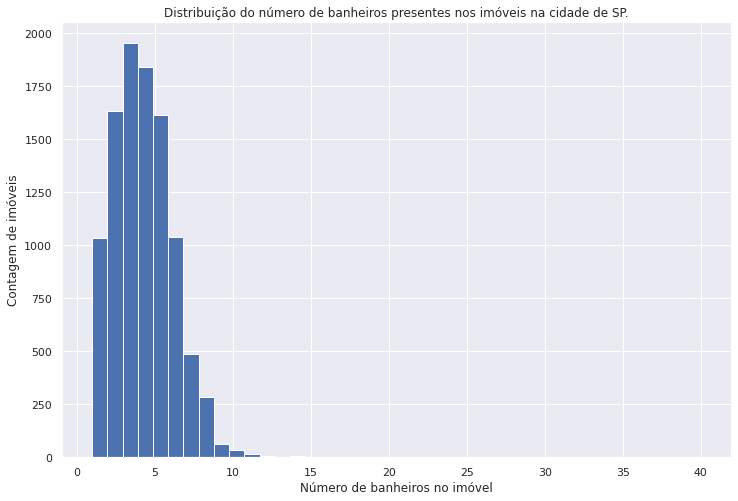

In [ ]:
fig, ax = plt.subplots()
ax = df_imoveis_sp["Banheiros"].plot(kind = "hist", bins = 40)
ax.set_xlabel("Número de banheiros no imóvel")
ax.set_ylabel("Contagem de imóveis")
ax.set_title("Distribuição do número de banheiros presentes nos imóveis na cidade de SP.")
fig.set_size_inches((12, 8))
plt.show()

Analisando o número de vagas de garagem nos imóveis

Os 10 imóveis com o maior número de vagas de garagem:

In [ ]:
df_imoveis_sp.nlargest(10, "Vagas")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4969,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,500,4,10,50,R$ 3.700.000
5450,Rua Comendador Elias Zarzur,Santo Amaro,São Paulo,505,4,10,50,R$ 3.700.000
2513,NaN,Vila Tramontano,São Paulo,1650,6,16,42,R$ 100.000\n /Mês
3098,NaN,Pacaembu,São Paulo,1490,5,11,40,R$ 25.000\n /Mês
3385,NaN,Pacaembu,São Paulo,1495,5,11,40,R$ 25.000\n /Mês
1586,Rua Araruba,Praia da Lagoa,São Paulo,600,4,5,38,R$ 7.500.000
2837,NaN,Morumbi,São Paulo,1327,3,8,34,R$ 120.000\n /Mês
1598,Rua Desembargador Paulo Passaláqua,Pacaembu,São Paulo,826,7,7,30,R$ 8.000.000
2739,NaN,Cidade Jardim,São Paulo,1530,5,5,30,R$ 90.000\n /Mês
2769,NaN,Cidade Jardim,São Paulo,1535,5,5,30,R$ 90.000\n /Mês


Os 10 imóveis com o menor número de vagas de garagem:

In [ ]:
df_imoveis_sp.nsmallest(10, "Vagas")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,R$ 199.900
22,"Rua Jaime Pinto Ferreira, 93",Vila Mazzei,São Paulo,120,2,1,1,R$ 490.000
23,Rua Aldo de Azevedo,Vila Madalena,São Paulo,170,2,2,1,R$ 1.485.000
35,Avenida Maria Estela,Jardim Maria Estela,São Paulo,110,2,1,1,R$ 445.000
44,"Avenida Presidente Tancredo Neves, 668",Vila Nancy,São Paulo,132,2,1,1,R$ 390.000
48,"Avenida Dom Rodrigo Sanches, 828",Jardim Amália,São Paulo,120,2,2,1,R$ 130.000
80,Rua José Sebastião de Sá,Jardim do Carmo,São Paulo,100,2,2,1,R$ 530.000
96,Rua Camberra,Vila Formosa,São Paulo,256,4,3,1,R$ 1.063.830
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
111,NaN,Vila Gustavo,São Paulo,200,4,3,1,R$ 550.000


In [ ]:
df_imoveis_sp["Vagas"].describe()

count   10008.00
mean        4.10
std         2.82
min         1.00
25%         2.00
50%         4.00
75%         5.00
max        50.00
Name: Vagas, dtype: float64

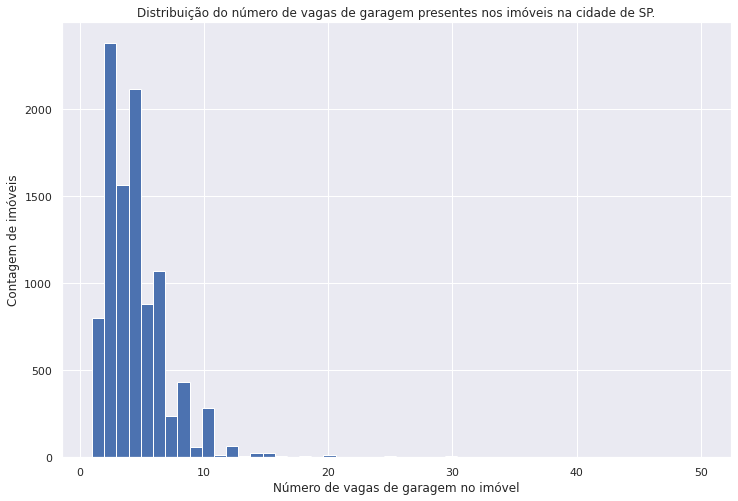

In [ ]:
fig, ax = plt.subplots()
ax = df_imoveis_sp["Vagas"].plot(kind = "hist", bins = 50)
ax.set_xlabel("Número de vagas de garagem no imóvel")
ax.set_ylabel("Contagem de imóveis")
ax.set_title("Distribuição do número de vagas de garagem presentes nos imóveis na cidade de SP.")
fig.set_size_inches((12, 8))
plt.show()

Analisando a metragem dos imóveis.

Os 10 imóveis com maior metragem:

In [ ]:
df_imoveis_sp.nlargest(10, "Metragem")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9845,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000,5,9,6,R$ 7.000.000
6600,Rua Benedito Felizardo,Sítio Represa,São Paulo,37000,4,2,4,R$ 2.900.000
6883,NaN,Jardim da Glória,São Paulo,35677,3,3,4,R$ 2.550.000
7930,"Rua Duque de Caxias, 298",Santo Amaro,São Paulo,7126,7,2,20,R$ 80.000\n /Mês
4788,Rua Canuto Borelli,Vila Castelo,São Paulo,2850,3,3,10,R$ 4.000.000
7791,Rua Itassuce,Pacaembu,São Paulo,2505,3,7,12,R$ 12.500.000
7906,Rua Itassuce,Pacaembu,São Paulo,2505,3,7,12,R$ 12.500.000
7067,Rua Itassuce,Pacaembu,São Paulo,2500,3,7,12,R$ 12.500.000
6908,NaN,Retiro Morumbi,São Paulo,2200,6,8,12,R$ 19.000.000
7026,Rua General Pereira da Cunha,Retiro Morumbi,São Paulo,2200,6,9,15,R$ 19.800.000


Os 10 imóveis com a menor metragem:

In [ ]:
df_imoveis_sp.nsmallest(10, "Metragem")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9603,Rua Pestana,Vila Guaca,São Paulo,10,3,2,2,R$ 800.000
5009,Rua Marie Nader Calfat,Jardim Ampliação,São Paulo,20,3,2,2,R$ 800.000
5059,Rua Marie Nader Calfat,Jardim Ampliação,São Paulo,25,3,2,2,R$ 800.000
5652,Rua Marie Nader Calfat,Jardim Ampliação,São Paulo,25,3,2,2,R$ 800.000
8553,Rua Barra da Jangada,Parada Inglesa,São Paulo,29,1,1,1,R$ 300.000
405,NaN,Vila Madalena,São Paulo,35,1,1,1,R$ 2.800\n /Mês
280,"Rua Ipomeias, 289",Vila Bela,São Paulo,36,2,1,1,R$ 190.000
7053,Rua Ipomeias,Vila Bela,São Paulo,36,2,1,1,R$ 196.000
9661,NaN,Vila Bela,São Paulo,36,2,1,1,R$ 200.000
2054,Rua Bela Vista,Santo Amaro,São Paulo,37,5,5,2,R$ 690.000


In [ ]:
df_imoveis_sp["Metragem"].describe()

count    10008.00
mean       442.30
std       7515.38
min         10.00
25%        173.00
50%        290.00
75%        460.25
max     750000.00
Name: Metragem, dtype: float64

Plotando a distribuição de imóveis pela metragem, mas excluindo imóveis com metragem acima de 3000

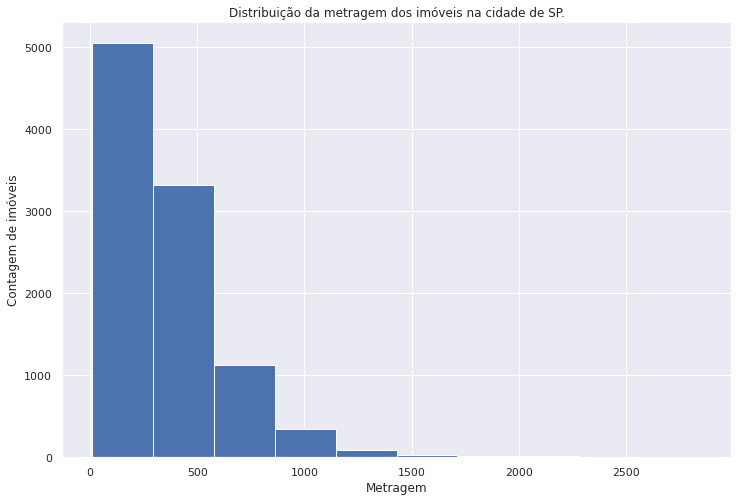

In [ ]:
fig, ax = plt.subplots()
ax = df_imoveis_sp[df_imoveis_sp["Metragem"] < 3000]["Metragem"].plot(kind = "hist")
ax.set_xlabel("Metragem")
ax.set_ylabel("Contagem de imóveis")
ax.set_title("Distribuição da metragem dos imóveis na cidade de SP.")
fig.set_size_inches((12, 8))
plt.show()

Agora vamos analisar se há alguma relação entre a metragem, o número de quartos, o número de banheiros e o número de vagas em um imóvel. Para isso, vamos analisar a matrix de correlação entre essas variáveis.

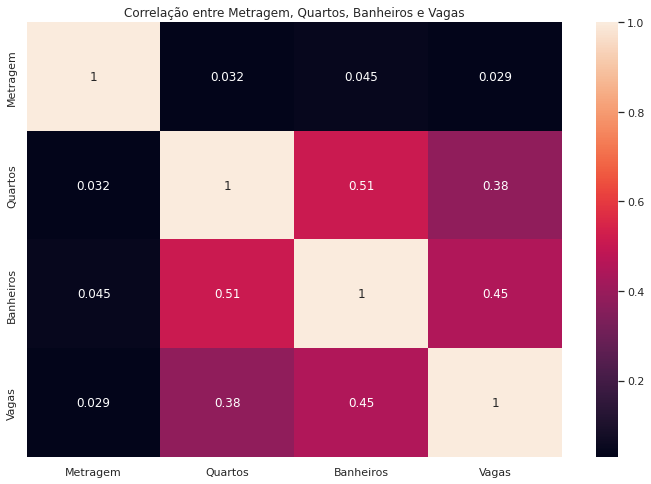

In [ ]:
fig, ax = plt.subplots()
ax = sns.heatmap(df_imoveis_sp[["Metragem", "Quartos", "Banheiros", "Vagas"]].corr(), annot = True)
ax.set_title("Correlação entre Metragem, Quartos, Banheiros e Vagas")
fig.set_size_inches((12, 8))
plt.show()

Analisando a matriz de correlação plotada na célula anterior, podemos ver que o número de quartos, o número de banheiros e o número de vagas em um imóvel tem uma correlação quase nula com a metragem do imóvel, o que nos diz que não possuem nenhuma relação. Entretanto, a correlação entre o número de quartos e banheiros é não nula e positiva, o que indica que em alguns casos quando o número de quartos aumenta o de banheiros também parece aumentar, ou vice-versa. Esse comportamento é esperado, uma vez que alguns imóveis podem conter suítes (quartos com banheiros), outro fator que pode explicar é que se um imóvel tem mais quartos, pode indicar que possa haver mais pessoas nele e com isso seja um número maior de banheiros para atender a todos. Também é possível observar que existe uma correlação não nula e positiva entre as variáveis número de quartos e vagas, assim como entre as variáveis número de banheiros e vagas, sendo a segunda maior que a primeira.

Quantidade de bairros na base de dados:

In [ ]:
len(df_imoveis_sp["Bairro"].unique())

702

Os 10 bairros com o maior número de imóveis no dataset em análise.

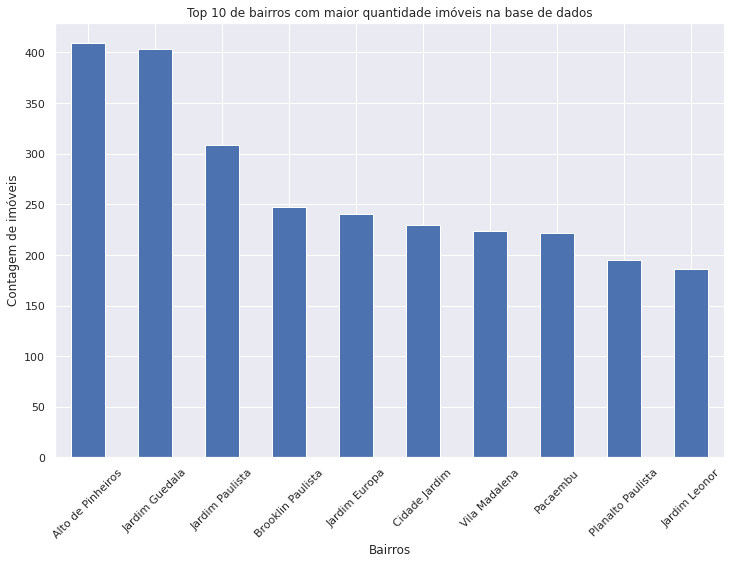

In [ ]:
qtde_imoveis_por_bairro = df_imoveis_sp["Bairro"].value_counts()
fig, ax = plt.subplots()
ax = qtde_imoveis_por_bairro[:10].plot(kind = "bar")
ax.tick_params(axis = "x", rotation = 45)
ax.set_xlabel("Bairros")
ax.set_ylabel("Contagem de imóveis")
ax.set_title("Top 10 de bairros com maior quantidade imóveis na base de dados")
fig.set_size_inches((12, 8))
plt.show()

Tratando a coluna valor.

In [ ]:
df_imoveis_sp[["moeda", "valor_anuncio", "tipo"]] = df_imoveis_sp["Valor"].str.split(expand = True)
df_imoveis_sp.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,moeda,valor_anuncio,tipo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [ ]:
df_imoveis_sp_filtrados = df_imoveis_sp[df_imoveis_sp["tipo"].isnull()]
del df_imoveis_sp_filtrados["Valor"]
del df_imoveis_sp_filtrados["moeda"]
del df_imoveis_sp_filtrados["tipo"]
df_imoveis_sp_filtrados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,valor_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540.000


In [ ]:
df_imoveis_sp_filtrados = df_imoveis_sp_filtrados.rename(columns={"valor_anuncio": "Valor (R$)"})
df_imoveis_sp_filtrados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor (R$)
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540.000


In [ ]:
df_imoveis_sp_filtrados["Valor (R$)"] = df_imoveis_sp_filtrados["Valor (R$)"].str.replace(".", "").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
df_imoveis_sp_filtrados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor (R$)
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00


In [ ]:
df_imoveis_sp_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rua         6107 non-null   object 
 1   Bairro      9146 non-null   object 
 2   Cidade      9156 non-null   object 
 3   Metragem    9156 non-null   int64  
 4   Quartos     9156 non-null   int64  
 5   Banheiros   9156 non-null   int64  
 6   Vagas       9156 non-null   int64  
 7   Valor (R$)  9156 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 643.8+ KB


Agora nossa coluna Valor (R$) apresenta tipo de dado numérico, o que nos permite operar com os dados dessa coluna.

Os 10 imóveis mais caro da base de dados:

In [ ]:
df_imoveis_sp_filtrados.nlargest(10, "Valor (R$)")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor (R$)
400,NaN,Jardim Europa,São Paulo,1510,5,5,20,65000000.00
1530,Praça Nicolau Scarpa,Jardim América,São Paulo,1200,4,4,25,65000000.00
6882,Rua Estados Unidos,Jardim América,São Paulo,1200,4,6,24,65000000.00
6131,Rua Estados Unidos,Jardim América,São Paulo,1816,4,10,20,55000000.00
3542,NaN,Jardim América,São Paulo,773,4,4,10,45825000.00
102,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,37000000.00
2906,Rua ESão Pauloanha,Jardim Europa,São Paulo,1400,4,8,6,35000000.00
8364,NaN,Jardim Petrópolis,São Paulo,912,4,6,10,32000000.00
108,NaN,Jardim Paulista,São Paulo,1060,5,5,4,30000000.00
573,NaN,Jardim Paulista,São Paulo,1060,5,3,4,30000000.00


Os 10 imóveis mais baratos da base de dados:

In [ ]:
df_imoveis_sp_filtrados.nsmallest(10, "Valor (R$)")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor (R$)
60,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,13000.00
11,NaN,Jardim Luzitânia,São Paulo,436,4,3,3,15000.00
48,"Avenida Dom Rodrigo Sanches, 828",Jardim Amália,São Paulo,120,2,2,1,130000.00
1596,"Rua Luís Botta, 1137",Cidade São Mateus,São Paulo,61,1,1,1,147288.00
2194,NaN,Cidade São Mateus,São Paulo,61,1,1,1,147288.00
9653,Rua Victória Simionato,Vila Paranaguá,São Paulo,45,1,1,1,160000.00
8415,Rua Júlio Salusse,Vila Aurea,São Paulo,182,3,1,2,165000.00
4861,NaN,Vila Cardoso Franco,São Paulo,80,3,2,1,180000.00
5345,NaN,Vila Cardoso Franco,São Paulo,85,3,2,1,180000.00
9316,Rua Cerveri de Girona,Jardim Morais Prado,São Paulo,125,2,2,2,180000.00


In [ ]:
df_imoveis_sp_filtrados.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor (R$)
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


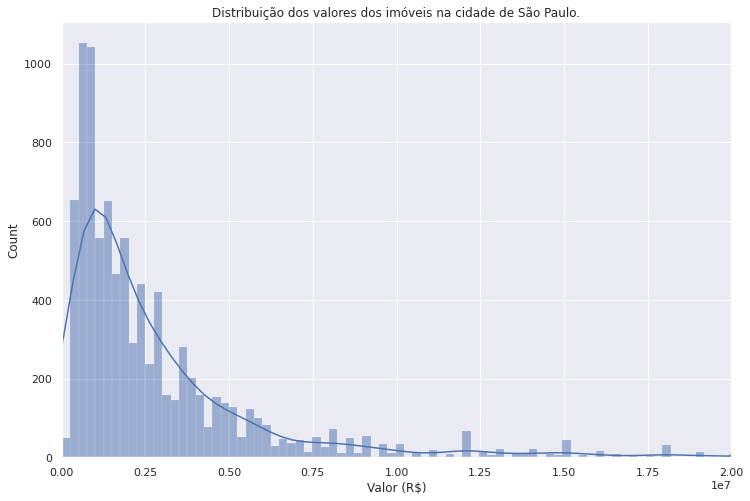

In [ ]:
fig, ax = plt.subplots()
ax = sns.histplot(x = "Valor (R$)", data = df_imoveis_sp_filtrados, kde = True)
ax.set_title("Distribuição dos valores dos imóveis na cidade de São Paulo.")
fig.set_size_inches((12,8))
plt.xlim((-50, 2*10**7))
plt.show()

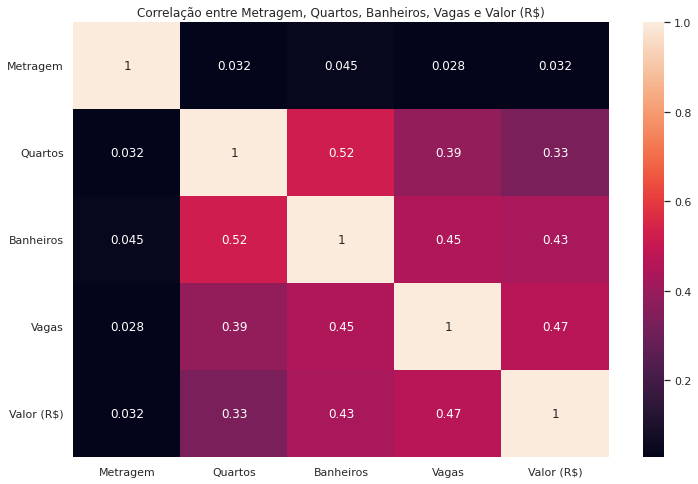

In [ ]:
fig, ax = plt.subplots()
ax = sns.heatmap(df_imoveis_sp_filtrados[["Metragem", "Quartos", "Banheiros", "Vagas", "Valor (R$)"]].corr(), annot = True)
ax.set_title("Correlação entre Metragem, Quartos, Banheiros, Vagas e Valor (R$)")
fig.set_size_inches((12, 8))
plt.show()

Calculando o valor do $m^2$ do imóvel:

In [ ]:
df_imoveis_sp_filtrados["Valor do m^2"] = df_imoveis_sp_filtrados["Valor (R$)"]/df_imoveis_sp_filtrados["Metragem"]
df_imoveis_sp_filtrados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor (R$),Valor do m^2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00


Agrupando os dados por bairro.

In [ ]:
df_imoveis_sp_filtrados_por_bairro = df_imoveis_sp_filtrados.groupby("Bairro").sum()
df_imoveis_sp_filtrados_por_bairro.head()

,Metragem,Quartos,Banheiros,Vagas,Valor (R$),Valor do m^2
Bairro,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55
Alto da Lapa,23940,252,308,320,166653500.00,608538.25
Alto da Mooca,5401,66,52,73,23683400.00,113834.80
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61


Calculando o valor do $m^2$ de cada bairro.

In [ ]:
df_imoveis_sp_filtrados_por_bairro["Valor do m^2"] = df_imoveis_sp_filtrados_por_bairro["Valor (R$)"]/df_imoveis_sp_filtrados_por_bairro["Metragem"]
df_imoveis_sp_filtrados_por_bairro.head()

,Metragem,Quartos,Banheiros,Vagas,Valor (R$),Valor do m^2
Bairro,,,,,,
Aclimação,19447,258,240,230,139292801.00,7162.69
Alto da Boa Vista,3351,33,41,37,19130000.00,5708.74
Alto da Lapa,23940,252,308,320,166653500.00,6961.30
Alto da Mooca,5401,66,52,73,23683400.00,4385.00
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,11126.34


Escolhendo os 10 bairros com o maior número de imóveis na base de dados para plotar o valor do $m^2$. Além disso, estamos resetando o índice do `DataFrame` agrupado por bairros.

In [ ]:
top_10_qtde_imoveis_bairros = df_imoveis_sp_filtrados["Bairro"].value_counts()[:10].index
df_imoveis_sp_filtrados_por_bairro.reset_index(inplace = True)
df_imoveis_sp_filtrados_por_bairro.head()

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor (R$),Valor do m^2
0,Aclimação,19447,258,240,230,139292801.00,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,11126.34


Plot do valor do $m^2$ dos bairros com maior número de imóveis na base de dados.

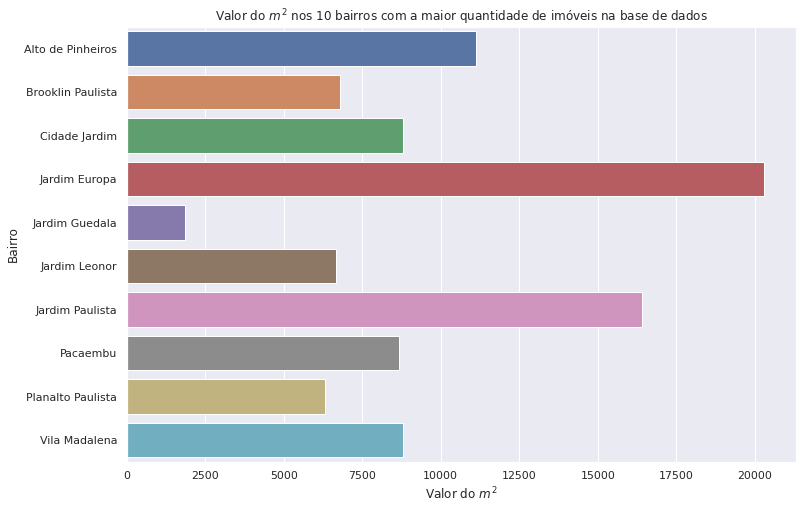

In [ ]:
fig, ax = plt.subplots()
ax = sns.barplot(x = "Valor do m^2", y = "Bairro", data = df_imoveis_sp_filtrados_por_bairro.query("Bairro in @top_10_qtde_imoveis_bairros"))
ax.set_xlabel(r"Valor do $m^2$")
ax.set_title(r"Valor do $m^2$ nos 10 bairros com a maior quantidade de imóveis na base de dados")
fig.set_size_inches((12, 8))
plt.show()

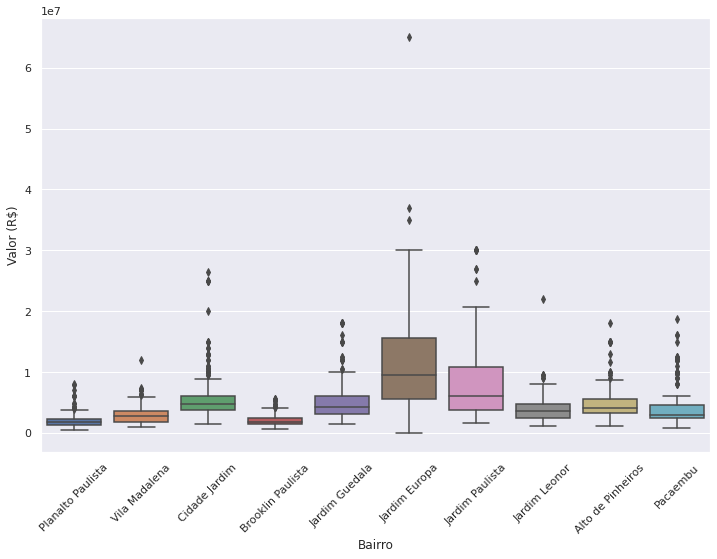

In [ ]:
fig, ax = plt.subplots()
ax = sns.boxplot(x = "Bairro", y = "Valor (R$)", data = df_imoveis_sp_filtrados.query("Bairro in @top_10_qtde_imoveis_bairros"))
ax.tick_params(axis = "x", rotation = 45)
fig.set_size_inches((12, 8))
plt.show()

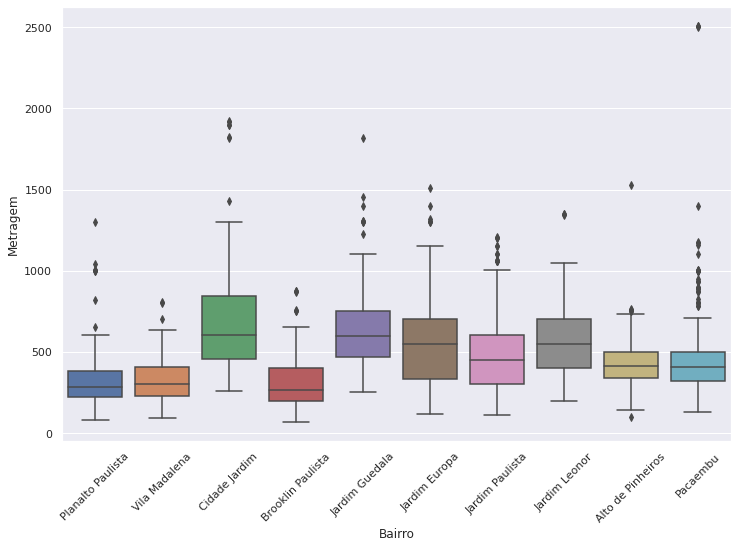

In [ ]:
fig, ax = plt.subplots()
ax = sns.boxplot(x = "Bairro", y = "Metragem", data = df_imoveis_sp_filtrados.query("Bairro in @top_10_qtde_imoveis_bairros & Metragem < 3000"))
ax.tick_params(axis = "x", rotation = 45)
fig.set_size_inches((12, 8))
plt.show()

## Agregando outras bases de dados

Importando a base de dados do Censo 2010 do IBGE

In [ ]:
ibge_dataset_url = 'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv'

df_ibge = pd.read_csv(ibge_dataset_url, encoding = "ISO-8859-1", sep = ';', thousands = '.', decimal = ',')
df_ibge.dropna(how = "all", axis = 1, inplace = True)
df_ibge.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [ ]:
df_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

Importando a base de dados de endereços.

In [ ]:
enderecos = pd.read_csv("/content/drive/MyDrive/Imersão de dados Alura - 2022/enderecos.csv")
enderecos.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.00,-30.88,-55.55
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.00,-30.86,-55.56
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.00,-30.86,-55.55
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.00,-30.86,-55.55


O `DataFrame` `enderecos` será utilizado para podermos realizar um merge da nossa base de dados original com a base de dados do IBGE.

Filtrando `enderecos` para que sejam selecionados apenas localizações em SP.

In [ ]:
enderecos_sp = enderecos.query("sigla_uf == 'SP'")
enderecos_sp.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35


In [ ]:
enderecos_sp["rua"] = enderecos_sp["tipo_logr"] + " " + enderecos_sp["logr_nome"]
enderecos_sp["rua"] = enderecos_sp["rua"].str.lower().str.strip()
enderecos_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35,rua joão bandini


In [ ]:
df_imoveis_sp_filtrados["rua_lower"] = df_imoveis_sp_filtrados["Rua"].str.extract(r'(^[\w ]+)')
df_imoveis_sp_filtrados["rua_lower"] = df_imoveis_sp_filtrados["rua_lower"].str.lower().str.strip()
df_imov_sp_filtrados_merge_enderecos = pd.merge(left = df_imoveis_sp_filtrados, right = enderecos_sp[["rua", "cep", "latitude", "longitude"]], how = "left", left_on = "rua_lower", right_on = "rua").drop_duplicates(subset = df_imoveis_sp_filtrados.columns).query("cep > 0")
del df_imov_sp_filtrados_merge_enderecos["rua_lower"]
del df_imov_sp_filtrados_merge_enderecos["rua"]
df_imov_sp_filtrados_merge_enderecos.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor (R$),Valor do m^2,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00,11443160.00,-23.98,-46.20
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68,4642020.00,-23.64,-46.69
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00,4845200.00,-23.75,-46.70
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,2209.68,18125000.00,-23.53,-47.26
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00,13474663.00,-22.70,-47.29


Importando a base de dados de setores do Censo 2010 do IBGE.

In [ ]:
setor_censo = gpd.read_file("/content/drive/MyDrive/Imersão de dados Alura - 2022/35SEE250GC_SIR.shp")
setor_censo.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.00,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.00,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.00,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


In [ ]:
setor_censo_sp = setor_censo[setor_censo["NM_MUNICIP"] == "SÃO PAULO"]

In [ ]:
df_imov_sp_filtrados_merge_enderecos["Point"] = ""

for i in df_imov_sp_filtrados_merge_enderecos.index:

  df_imov_sp_filtrados_merge_enderecos["Point"][i] = Point(df_imov_sp_filtrados_merge_enderecos["longitude"][i], df_imov_sp_filtrados_merge_enderecos["latitude"][i])

df_imov_sp_filtrados_merge_enderecos["Setor censo"] = df_imov_sp_filtrados_merge_enderecos["Point"].map(lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values).str[0]
df_imov_sp_filtrados_merge_enderecos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor (R$),Valor do m^2,cep,latitude,longitude,Point,Setor censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00,11443160.00,-23.98,-46.20,POINT (-46.2013172 -23.975993),NaN
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,2209.68,18125000.00,-23.53,-47.26,POINT (-47.2550228 -23.5310431),NaN
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00,13474663.00,-22.70,-47.29,POINT (-47.2944609 -22.6989009),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,5617.98,4058020.00,-23.61,-46.65,POINT (-46.6472577 -23.6090928),355030877000099
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,7000.00,4671185.00,-23.66,-46.69,POINT (-46.6915206 -23.661018),355030816000087
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000.00,3801.65,13030640.00,-22.92,-47.08,POINT (-47.0769595 -22.9227492),NaN
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,5121.95,4145020.00,-23.62,-46.63,POINT (-46.632983 -23.6161237),355030877000052


Importando a base de dados com dados tratados para realizar o merge com a base de dados do IBGE 

In [ ]:
dados_geo = pd.read_csv("/content/drive/MyDrive/Imersão de dados Alura - 2022/dados_geo.csv")
dados_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,7.00,7000.00,Avenida Itacira,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,3.70,7459.68,Rua Aurelia Perez Alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,0.38,3040.00,Rua Alba Valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,0.54,5400.00,Rua Tobias Barreto,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,1.98,4500.00,Rua Graham Bell,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,1500000.00,NaN,1.50,5617.98,Avenida Odila,4058020.00,-23.61,-46.65,POINT (-46.6472577 -23.6090928),355030877000099.00
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,665000.00,NaN,0.67,7000.00,Rua Tapuçu,4671185.00,-23.66,-46.69,POINT (-46.6915206 -23.661018),355030816000087.00
5602,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,2300000.00,NaN,2.30,3801.65,Rua Guararema,4136030.00,-23.41,-46.04,POINT (-46.0373872 -23.411688),NaN
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,1050000.00,NaN,1.05,5121.95,Rua Estero Belaco,4145020.00,-23.62,-46.63,POINT (-46.632983 -23.6161237),355030877000052.00


In [ ]:
dados_vendas_censo = pd.merge(left = dados_geo, right = df_ibge, how = "left", left_on = "setor_censo", right_on = "Cod_setor")
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,1500000.00,NaN,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,665000.00,NaN,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5602,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,2300000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,1050000.00,NaN,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [ ]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5605 entries, 0 to 5604
Data columns (total 51 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rua                    5605 non-null   object 
 1   Bairro                 5597 non-null   object 
 2   Cidade                 5605 non-null   object 
 3   Metragem               5605 non-null   int64  
 4   Quartos                5605 non-null   int64  
 5   Banheiros              5605 non-null   int64  
 6   Vagas                  5605 non-null   int64  
 7   Valor                  5605 non-null   object 
 8   Valor_anuncio          5605 non-null   float64
 9   Tipo_anuncio           0 non-null      float64
 10  Valor_mm               5605 non-null   float64
 11  Valor_m2               5605 non-null   float64
 12  rua                    5605 non-null   object 
 13  cep                    5605 non-null   float64
 14  latitude               5605 non-null   float64
 15  long

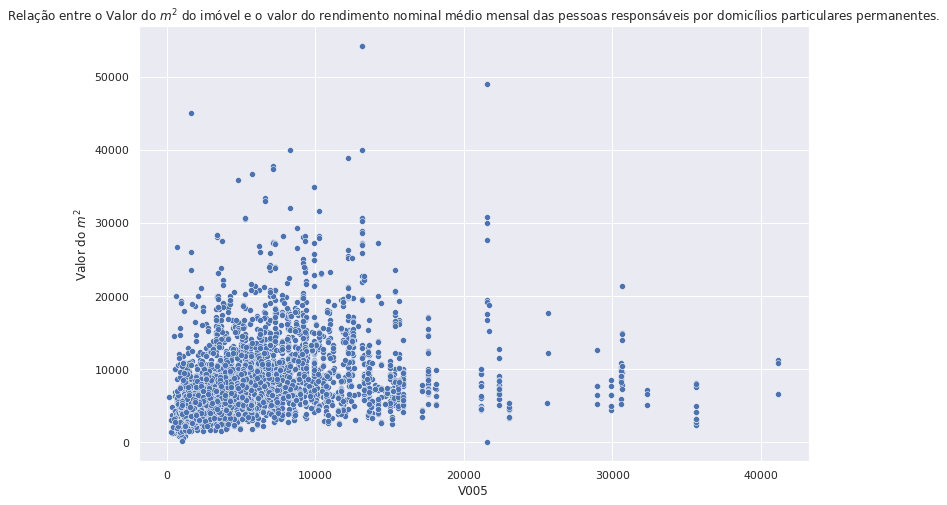

In [ ]:
fig, ax = plt.subplots()
ax = sns.scatterplot(x = "V005", y = "Valor_m2", data = dados_vendas_censo)
ax.set_ylabel(r"Valor do $m^2$")
ax.set_title(r"Relação entre o Valor do $m^2$ do imóvel e o valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes.")
fig.set_size_inches((12,8))

In [ ]:
dados_vendas_censo = dados_vendas_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()
dados_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,0.54,5400.00,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,1.98,4500.00,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,0.96,6114.65,...,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06,26562232.53,4551.66,29032823.35
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,1.50,5617.98,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,0.67,7000.00,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,1.05,5121.95,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


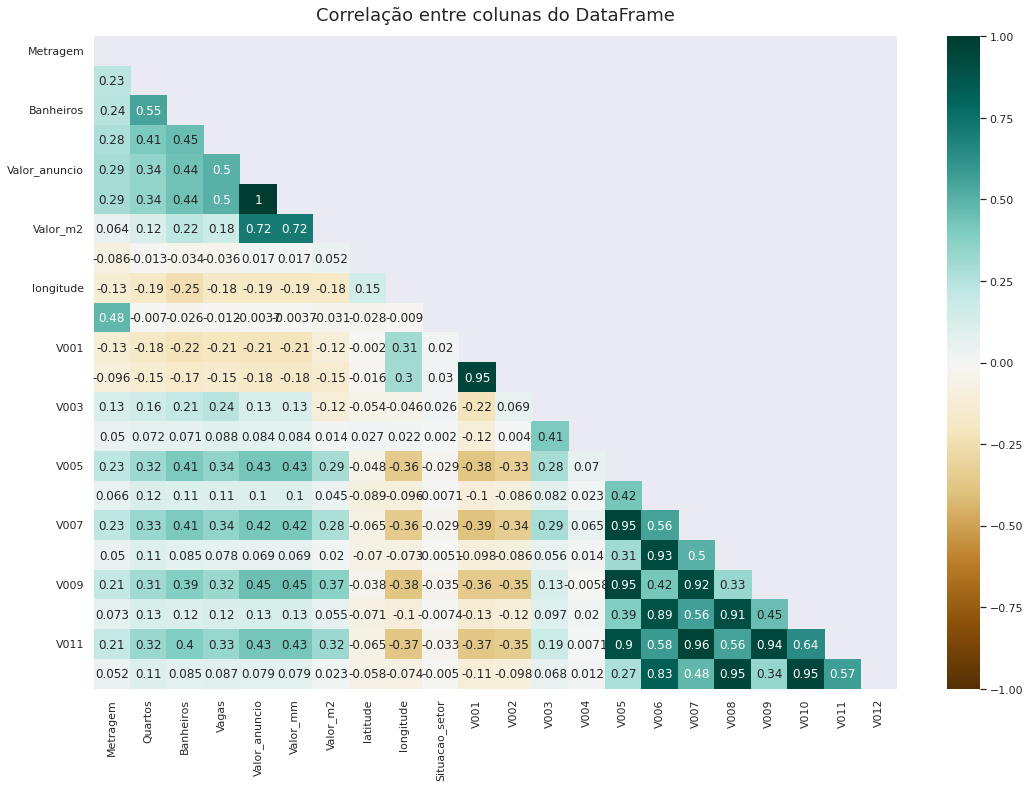

In [ ]:
fig, ax = plt.subplots()
mask = np.triu(np.ones_like(dados_vendas_censo.corr(), dtype = bool))
ax = sns.heatmap(dados_vendas_censo.corr(), mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')
ax.set_title("Correlação entre colunas do DataFrame", fontdict = {"fontsize": 18}, pad = 16)
fig.set_size_inches((18,12))
plt.show()

# Tentando prever o preço dos imóveis do `DataFrame` usando a biblioteca scikit-learn

Importando os modelos lineares

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
dados_vendas_censo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5308 entries, 0 to 5604
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rua             5308 non-null   object 
 1   Bairro          5308 non-null   object 
 2   Cidade          5308 non-null   object 
 3   Metragem        5308 non-null   int64  
 4   Quartos         5308 non-null   int64  
 5   Banheiros       5308 non-null   int64  
 6   Vagas           5308 non-null   int64  
 7   Valor_anuncio   5308 non-null   float64
 8   Valor_mm        5308 non-null   float64
 9   Valor_m2        5308 non-null   float64
 10  latitude        5308 non-null   float64
 11  longitude       5308 non-null   float64
 12  Situacao_setor  5308 non-null   float64
 13  V001            5308 non-null   float64
 14  V002            5308 non-null   float64
 15  V003            5308 non-null   float64
 16  V004            5308 non-null   float64
 17  V005            5308 non-null   f

In [ ]:
X = dados_vendas_censo[["Metragem", "Quartos", "Banheiros", "longitude", "latitude", "Vagas", "V005", "V007", "V009", "V011"]]
y = dados_vendas_censo["Valor_anuncio"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)
y_predict_test = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_predict_test)
mape = mean_absolute_percentage_error(y_test, y_predict_test)
r2score = r2_score(y_test, y_predict_test)

In [ ]:
mae

1469023.301633383

In [ ]:
mape

0.7209280521946548

In [ ]:
r2score

0.4000315101296815

In [ ]:
ridge = Ridge(alpha = 0.5)

In [ ]:
ridge.fit(X_train, y_train)
y_predict_test = ridge.predict(X_test)
mae = mean_absolute_error(y_test, y_predict_test)
mape = mean_absolute_percentage_error(y_test, y_predict_test)
r2score = r2_score(y_test, y_predict_test)

In [ ]:
mae

1468271.986977499

In [ ]:
mape

0.7200269870551751

In [ ]:
r2score

0.40009138205149786

In [ ]:
lasso = Lasso()

In [ ]:
lasso.fit(X_train, y_train)
y_predict_test = lasso.predict(X_test)
mae = mean_absolute_error(y_test, y_predict_test)
mape = mean_absolute_percentage_error(y_test, y_predict_test)
r2score = r2_score(y_test, y_predict_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.417e+16, tolerance: 5.440e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
mae

1469021.459905151

In [ ]:
mape

0.720926458039968

In [ ]:
r2score

0.40003156056276123